In [1]:
# Falls du deine Ergebnisse sichern willst, kannst du dein Google Drive mounten.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
# Anschließend ins Drive-Verzeichnis navigieren
!cd /content/gdrive/MyDrive

/bin/bash: line 0: cd: /content/gdrive/MyDrive: No such file or directory


In [2]:
# Repo clonen
!git clone https://github.com/crowsonkb/style-transfer-pytorch

Cloning into 'style-transfer-pytorch'...
remote: Enumerating objects: 543, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 543 (delta 4), reused 7 (delta 2), pack-reused 532
Receiving objects: 100% (543/543), 2.72 MiB | 24.04 MiB/s, done.
Resolving deltas: 100% (339/339), done.


Um Pfade in die Zwischenablage zu bekommen:
Klicke auf das kleine Ordner-Symbol zur Linken. Navigiere zum gewünschten Ordner. Rechtsklick auf der Ordner -> Pfad kopieren.

In [5]:
# Installiert alles nötige für das Programm.
!pip install -e PFAD-ZUM-REPO-ORDNER
# Danach muss die Runtime neugestartet werden. Gehe hierzu oben auf Laufzeit --> Laufzeit neu starten.
# Verfahre dann mit der nächsten Zelle unterhalb dieser Zelle weiter.

Obtaining file:///content/style-transfer-pytorch
     |████████████████████████████████| 1.1 MB 12.7 MB/s 
     |████████████████████████████████| 4.3 MB 40.8 MB/s 
     |████████████████████████████████| 271 kB 52.0 MB/s 
     |████████████████████████████████| 144 kB 41.9 MB/s 
     |████████████████████████████████| 94 kB 3.6 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Running setup.py develop for style-transfer-pytorch
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
# In die Repo navigieren
!cd style-transfer-pytorch/

In [5]:
# Da wir neugestartet haben und wieder im Start-Directory sind, navigieren wir wieder in den style-transfer-Ordner.
# Falls kein Gdrive benutzt wird:
!cd style-transfer-pytorch/

In [7]:
# Falls Gdrive benutzt wird:
!cd /content/gdrive/MyDrive
!cd style-transfer-pytorch/

Nun müssen wir Bilder hochladen. Du kannst entweder in Google Drive Bilder in den style-transfer-pytorch-Ordner droppen oder in Colab zur Linken auf das kleine Ordner-Symbol klicken. Dann gdrive -> MyDrive und es sollte der style-transfer-pytorch-Ordner sichtbar werden.

In [ ]:
# Anschließend müssen wir die Pfade angeben und die folgende Line ausführen.
# Heißt dein Content-Bild "content.jpg" und dein Style-Bild "style.jpg" schreibst du entsprechend: !style_transfer content.jpg style.jpg -o output.jpg --web

!style_transfer content.jpg style.jpg -o output.jpg --web

In [ ]:
#Alternativ können Bilder auch mit !wget von direct-Links geladen werden. Z.B. wie im Folgenden:
!wget https://upload.wikimedia.org/wikipedia/commons/1/15/Caspar_David_Friedrich_-_Landschaft_mit_Gebirgssee%2C_Morgen.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/3/35/Neckertal_20150527-6384.jpg/2880px-Neckertal_20150527-6384.jpg

In [6]:
!style_transfer /content/2880px-Neckertal_20150527-6384.jpg /content/Caspar_David_Friedrich_-_Landschaft_mit_Gebirgssee,_Morgen.jpg -o output.jpg --web

Using devices: cuda:0
GPU 0 type: Tesla K80 (compute 3.7)
GPU 0 RAM: 11441 MB
Starting web interface at http://0.0.0.0:8080/
Task exception was never retrieved
future: <Task finished coro=<WebInterface.run_app() done, defined at /content/style-transfer-pytorch/style_transfer/web_interface.py:62> exception=OSError(98, "error while attempting to bind on address ('0.0.0.0', 8080): address already in use")>
Traceback (most recent call last):
  File "/content/style-transfer-pytorch/style_transfer/web_interface.py", line 66, in run_app
    await site.start()
  File "/usr/local/lib/python3.7/dist-packages/aiohttp/web_runner.py", line 128, in start
    reuse_port=self._reuse_port,
  File "/usr/lib/python3.7/asyncio/base_events.py", line 1389, in create_server
    % (sa, err.strerror.lower())) from None
OSError: [Errno 98] error while attempting to bind on address ('0.0.0.0', 8080): address already in use
Loading model...
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to 

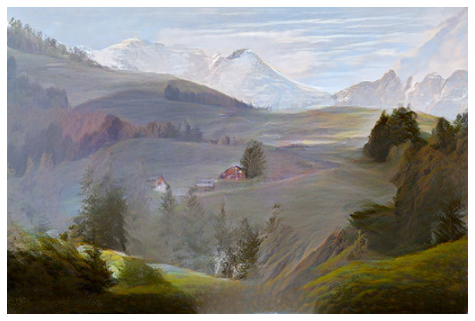

In [11]:
# Ergebnis anschauen.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def display_image_in_actual_size(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    height, width, depth = im_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

display_image_in_actual_size('output.jpg')

Desweiteren können wir Hyperparameter tweaken um andere Resultate aus den selben Bildern zu bekommen:

**-s (--end-scale)** sets the maximum image dimension (height and width) of the output. A large image (e.g. 2896x2172) can take around fifteen minutes to generate on an RTX 3090 and will require nearly all of its 24GB of memory. Since both memory usage and runtime increase linearly in the number of pixels (quadratically in the value of the --end-scale parameter), users with less GPU memory or who do not want to wait very long are encouraged to use smaller resolutions. The default is 512.

**-sw (--style-weights)** specifies factors for the weighted average of multiple styles if there is more than one style image specified. These factors are automatically normalized to sum to 1. If omitted, the styles will be blended equally.

**-cw (--content-weight)** sets the degree to which features from the content image are included in the output image. The default is 0.015.

**-tw (--tv-weight)** sets the strength of the smoothness prior. The default is 2.

In [12]:
# Lets go bigger (das wird auf einer K80 bereits einige Minuten lange dauern.)
!style_transfer /content/2880px-Neckertal_20150527-6384.jpg /content/Caspar_David_Friedrich_-_Landschaft_mit_Gebirgssee,_Morgen.jpg -o output_large.jpg --web -s 1000

Using devices: cuda:0
GPU 0 type: Tesla K80 (compute 3.7)
GPU 0 RAM: 11441 MB
Starting web interface at http://0.0.0.0:8080/
Task exception was never retrieved
future: <Task finished coro=<WebInterface.run_app() done, defined at /content/style-transfer-pytorch/style_transfer/web_interface.py:62> exception=OSError(98, "error while attempting to bind on address ('0.0.0.0', 8080): address already in use")>
Traceback (most recent call last):
  File "/content/style-transfer-pytorch/style_transfer/web_interface.py", line 66, in run_app
    await site.start()
  File "/usr/local/lib/python3.7/dist-packages/aiohttp/web_runner.py", line 128, in start
    reuse_port=self._reuse_port,
  File "/usr/lib/python3.7/asyncio/base_events.py", line 1389, in create_server
    % (sa, err.strerror.lower())) from None
OSError: [Errno 98] error while attempting to bind on address ('0.0.0.0', 8080): address already in use
Loading model...
Processing content image (177x118)...
Processing style image (177x137)...

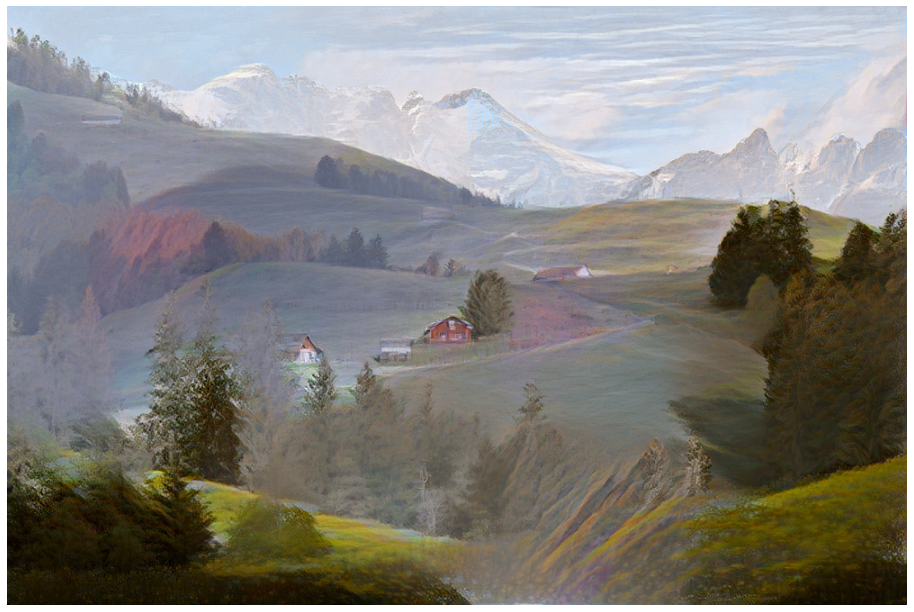

In [14]:
# Anschauen
display_image_in_actual_size('output_large.jpg')

In [15]:
# Es ist auch mögliche mehrere Style-Referenzen zu nutzen.
!wget https://upload.wikimedia.org/wikipedia/commons/3/35/Rembrandt_-_Landscape_with_a_Long_Arched_Bridge_-_WGA19226.jpg

--2022-03-29 10:03:57--  https://upload.wikimedia.org/wikipedia/commons/3/35/Rembrandt_-_Landscape_with_a_Long_Arched_Bridge_-_WGA19226.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111807 (109K) [image/jpeg]
Saving to: ‘Rembrandt_-_Landscape_with_a_Long_Arched_Bridge_-_WGA19226.jpg’

Rembrandt_-_Landsca 100%[===================>] 109.19K  --.-KB/s    in 0.01s   

2022-03-29 10:03:57 (8.33 MB/s) - ‘Rembrandt_-_Landscape_with_a_Long_Arched_Bridge_-_WGA19226.jpg’ saved [111807/111807]



In [18]:
# Wir übergeben keine style-weights, daher werden beide Style-Referenzen gleich stark gewichtet.
!style_transfer /content/2880px-Neckertal_20150527-6384.jpg /content/Caspar_David_Friedrich_-_Landschaft_mit_Gebirgssee,_Morgen.jpg /content/Rembrandt_-_Landscape_with_a_Long_Arched_Bridge_-_WGA19226.jpg -o mit_rembrandt.jpg --web -s 500

Using devices: cuda:0
GPU 0 type: Tesla K80 (compute 3.7)
GPU 0 RAM: 11441 MB
Starting web interface at http://0.0.0.0:8080/
Task exception was never retrieved
future: <Task finished coro=<WebInterface.run_app() done, defined at /content/style-transfer-pytorch/style_transfer/web_interface.py:62> exception=OSError(98, "error while attempting to bind on address ('0.0.0.0', 8080): address already in use")>
Traceback (most recent call last):
  File "/content/style-transfer-pytorch/style_transfer/web_interface.py", line 66, in run_app
    await site.start()
  File "/usr/local/lib/python3.7/dist-packages/aiohttp/web_runner.py", line 128, in start
    reuse_port=self._reuse_port,
  File "/usr/lib/python3.7/asyncio/base_events.py", line 1389, in create_server
    % (sa, err.strerror.lower())) from None
OSError: [Errno 98] error while attempting to bind on address ('0.0.0.0', 8080): address already in use
Loading model...
Processing content image (177x118)...
Processing style image (177x137)...

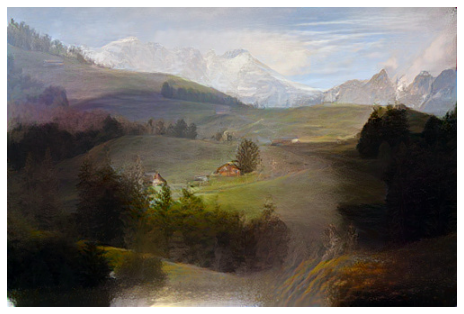

In [19]:
# Anschauen
display_image_in_actual_size('mit_rembrandt.jpg')